# Regression Models with Random Forest

In Part 4, we will be building a regression model for PLK1 (Polo-like Kinase 1 using the random forest algorithm. Random forest is an ensemble learning method that combines multiple decision trees to improve the accuracy and robustness of the model. We will be using the bioactivity data and molecular descriptors that we prepared in Part 3 to train the random forest model. The goal is to predict the pIC50 value of a compound given its molecular descriptor values. We will be using the scikit-learn library in Python to build the model.

# Import libraries

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Loading dataset


These two lines of code read in the dataset saved in the plk1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv file into a pandas DataFrame called df, and then drop any rows with missing values from df. The resulting DataFrame will contain the molecular descriptors (in the form of PubChem fingerprints) in columns, as well as the pIC50 values (i.e. bioactivity) in a separate column.

In [ ]:
df = pd.read_csv('plk1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df = df.dropna()


This code drops the column 'pIC50' from the DataFrame df and assigns the resulting DataFrame to X.

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1307,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1308,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1309,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


The variable Y contains the pIC50 values, while X contains the molecular descriptors.

In [ ]:
Y = df.pIC50

# Looking at the dimensions of the data

The output shows the number of rows and columns for X, which will be the number of compounds and the number of molecular descriptors, respectively, and the number of rows for Y, which will be the number of compounds.

In [ ]:
print(X.shape)
print(Y.shape)

(1311, 881)
(1311,)


#Getting rid of Low Variance Features

The VarianceThreshold(threshold=(.8 * (1 - .8))), the threshold value is set to 0.16, which is the result of the calculation 0.8 * (1 - 0.8). This threshold value means that any feature (column) in the dataset that has a variance less than 0.16 will be removed.

The reason for using this threshold is to remove features with low variance, as they do not contribute much to the prediction task and may even introduce noise to the model. By removing such features, we can simplify the model and improve its performance.

A variance less than 0.16 means that the feature has very low variation or no variation at all, which means it does not provide any information for the prediction task and should be removed.

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

Once the low variance features are removed we are left with 161 features previous x.shape output (1311, 881)

In [ ]:
X.shape

(1311, 161)

# 80/20 Ratio

This uses scikit-learn's train_test_split function to split the data into training and testing sets. X contains the independent variables or features, and Y contains the dependent variable or target variable.

X: independent variables
Y: dependent variable
test_size=0.2: test set size is set to 20% of the data, and the remaining 80% is used for training.
The function returns four variables: X_train, X_test, Y_train, Y_test. X_train and Y_train are used to train the model, while X_test and Y_test are used to evaluate its performance.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1048, 161), (1048,), (263, 161), (263,))

# Regression Model using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

np.random.seed(100)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)

print("R^2 score:", r2)

R^2 score: 0.6391699214922457



The output shows the actual pIC50 values of the first 10 compounds in the test set. The pIC50 is a measure of the potency of a compound in inhibiting a biological target (in this case, PLK1), where higher values indicate greater potency.

The Y_test contains the actual pIC50 values from the test set, and Y_pred contains the predicted pIC50 values for the same compounds in the test set. These two arrays will be used to create a scatter plot where the x-axis corresponds to the experimental pIC50 values from Y_test and the y-axis corresponds to the predicted pIC50 values from Y_pred

In [ ]:
Y_pred = model.predict(X_test)
Y_test[:10]

183     4.677781
967     7.677781
1228    8.208309
284     7.769551
166     7.443697
561     6.087778
840     7.283997
769     4.000000
1292    4.552842
1095    5.703335
Name: pIC50, dtype: float64

The length of Y_pred and Y_test are the same, indicating that the predicted values from the model and the actual test set values have been compared for all 263 instances in the test set.






In [ ]:
print(len(Y_pred))
print(len(Y_test))

263
263


<function matplotlib.pyplot.show(close=None, block=None)>

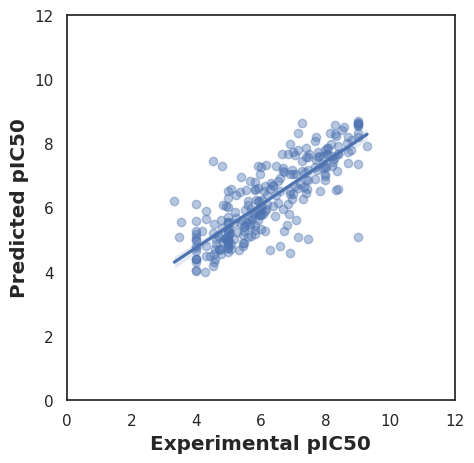

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x = Y_test, y = Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# Interpretation



*  The best-performing algorithm will be selected for further analysis. the R-squared (r^2) value obtained in this project is 0.639. This indicates that the model can explain about 63.9% of the variance in the pIC50 values of the test dataset, making it a moderate predictor of the biological activity of the tested compounds.

* The acceptable range for an R-squared score varies depending on the complexity of the problem, the size of the dataset, and the specific goals of the project. In the context of drug discovery, an R-squared score above 0.5 is considered acceptable, while scores above 0.7 or 0.8 are considered very good.

* The scatter plot with a regression line shows the relationship between the experimental and predicted pIC50 values. The scatter plot points are color-coded to show density where multiple points overlap, using a low alpha value of 0.4. The scatter plot points that fall closer to the regression line indicate a good correlation between the experimental and predicted values, while those that are far from the regression line indicate poor correlation.

* The plot provides a clear visual representation of how well the model predicted the experimental pIC50 values. The x-axis represents the experimental pIC50 values, while the y-axis represents the predicted pIC50 values. The xlim and ylim functions axes ranges of the plot to 4.0-8.2. 


* The plot provides a clear visual representation of how well the model predicted the experimental pIC50 values. The x-axis represents the experimental pIC50 values, while the y-axis represents the predicted pIC50 values. The xlim and ylim functions axes ranges of the plot to 4.0-8.2.

Overall, this project demonstrates the use of machine learning techniques to predict the biological activity of compounds based on their chemical structure. The model obtained a moderate level of accuracy, which can be improved by refining the feature engineering process, optimizing the hyperparameters, and increasing the size of the dataset. This project serves as a foundation for further research in the field of drug discovery and can help accelerate the development of new treatments for various diseases.